In [128]:
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.constants as sc
from importlib import reload
import AHM
reload(AHM)
#n=0
date = '160925'

In [129]:
k = np.linspace(0, 2*np.pi, 40)
#k = np.array([0, np.pi, np.pi*2])

In [130]:
n

10

In [131]:
'''for UBs in range(11):
    for Us in [0]:
        import numpy as np
        import os
        import matplotlib.pyplot as plt
        import scipy.constants as sc
        from importlib import reload
        import AHM
        reload(AHM)
        n+=1
        T=0
        mM = AHM.Model(Del0A = 2, Del0B=0, Del0C= 2, nA=0, nB=0, nC=0, U=Us, UB=UBs, muB=0, mu=0, t=1, inhomp=True, inhomi=True)
        alpha=0.7
        #mM.DeltaN(k,T)
        vals = mM.Deltra(k, T=T, g=0.001, HF=False, Nmax=120, Nmin=10, alpha=alpha)

        dels = vals[0]
        nus = vals[2]

        fol = f'calc{date}_{n}'
        newpath = r"C:\Users\atsch\Desktop\MasterVorlesungen\Sommer25\Lieb-Lattice\Pictures\scf\'"+fol

        if not os.path.exists(newpath):
            os.makedirs(newpath)

        filename = "parameters.txt"

        text = os.path.join(newpath, filename)

        with open(text, "w") as file:
            file.write(f"mM = AHM.Model(Del0A, Del0B, Del0C= {dels[:,0]}, nA, nB, nC={nus[:,0]}, U={mM.U}, UB={mM.UB}, mu={mM.mu}, muB={mM.muB}, t={mM.t}, inhomp={mM.inhomp}, inhomi={mM.inhomi})\n alpha={alpha}\n Temperature={T}\n dels: {dels}\nnus: {nus}")
            file.close
        
        #da, db, dc = dels[:,-1]
        #na, nb, nc = nus[:,-1]
        #mM = AHM.Model(Del0A = da, Del0B=db, Del0C= dc, nA=na, nB=nb, nC=nc,mu=0, U=3, t=1, inhomp=False, inhomi=True)
        H = mM.HBdG()
        k = np.linspace(0, np.pi, 100)

        k1 = np.ones(100)
        k0 = np.zeros(100)
        path = np.concatenate((k, k, k*np.sqrt(2)))
        kx = np.concatenate((k,np.pi*k1, k[::-1]))
        ky = np.concatenate((k0, k, k[::-1]))

        p = [i for i in range(np.shape(path)[0])]
        np.shape(p)
        energies = mM.solvHam(kx, ky)

        np.shape(energies)
        emax = np.amax(energies)
        emax = emax+0.1*emax

        np.savetxt(newpath +"//dels.txt", dels, delimiter=",")
        np.savetxt(newpath +"//nus.txt", nus, delimiter=",")
        np.savetxt(newpath +"//energies.txt", energies, delimiter=",")'''

        



SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 620-621: truncated \UXXXXXXXX escape (1783056623.py, line 56)

In [132]:
n+=1
T=0
mM = AHM.Model(Del0A = 3, Del0B=3, Del0C= 3, nA=0, nB=0, nC=0, U=1, UB=1, muB=0, mu=0, t=1, inhomp=True, inhomi=True)
alpha=0.7
#mM.DeltaN(k,T)
vals = mM.Deltra(k, T=T, g=0.001, HF=False, Nmax=120, Nmin=10, alpha=alpha)

dels = vals[0]
nus = vals[2]

fol = f'calc{date}_{n}'
newpath = r"C:\Users\atsch\Desktop\MasterVorlesungen\Sommer25\Lieb-Lattice\Pictures\scf\'"+fol

if not os.path.exists(newpath):
    os.makedirs(newpath)

filename = "parameters.txt"

text = os.path.join(newpath, filename)

with open(text, "w") as file:
    file.write(f"mM = AHM.Model(Del0A, Del0B, Del0C= {dels[:,0]}, nA, nB, nC={nus[:,0]}, U={mM.U}, UB={mM.UB}, mu={mM.mu}, muB={mM.muB}, t={mM.t}, inhomp={mM.inhomp}, inhomi={mM.inhomi})\n alpha={alpha}\n Temperature={T}\n dels: {dels}\nnus: {nus}")
    file.close
        
        #da, db, dc = dels[:,-1]
        #na, nb, nc = nus[:,-1]
        #mM = AHM.Model(Del0A = da, Del0B=db, Del0C= dc, nA=na, nB=nb, nC=nc,mu=0, U=3, t=1, inhomp=False, inhomi=True)
H = mM.HBdG()
k = np.linspace(0, np.pi, 100)

k1 = np.ones(100)
k0 = np.zeros(100)
path = np.concatenate((k, k, k*np.sqrt(2)))
kx = np.concatenate((k,np.pi*k1, k[::-1]))
ky = np.concatenate((k0, k, k[::-1]))

p = [i for i in range(np.shape(path)[0])]
np.shape(p)
energies = mM.solvHam(kx, ky)

np.shape(energies)
emax = np.amax(energies)
emax = emax+0.1*emax

np.savetxt(newpath +"//dels.txt", dels, delimiter=",")
np.savetxt(newpath +"//nus.txt", nus, delimiter=",")
np.savetxt(newpath +"//energies.txt", energies, delimiter=",")

In [133]:
nus

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

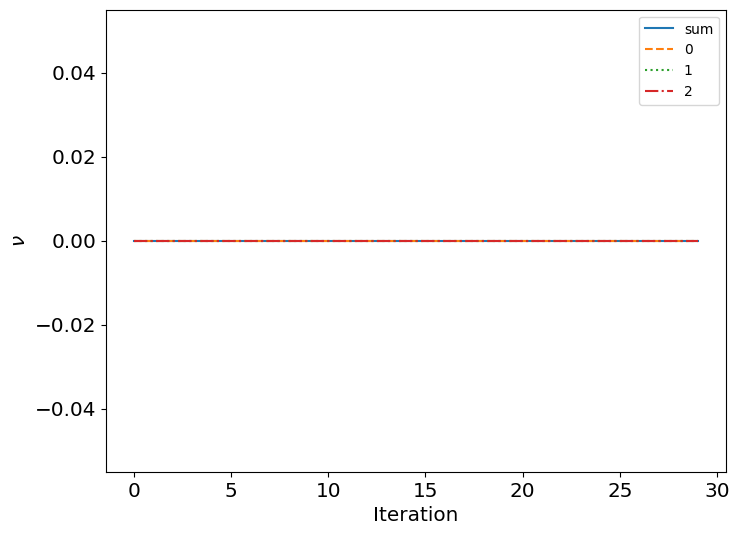

In [134]:
s1 = [np.sum(nus[:,i]) for i in range(np.shape(nus)[1])]

plt.figure(figsize=(8,6))
plt.xlabel('Iteration', size='x-large')
plt.ylabel(r'$\nu$', size='x-large')
plt.xticks(size='x-large')
plt.yticks(size='x-large')
#plt.ylim(0,0.35)
colors=['dashed', 'dotted', 'dashdot']
plt.plot(np.arange(len(s1)), s1, label = r'sum')
for i in range(3):
    plt.plot(np.arange(len(s1)),nus[i],linestyle=colors[i], label=f'{i}')

plt.legend()
plt.savefig(newpath+"//nu.png")
plt.show()

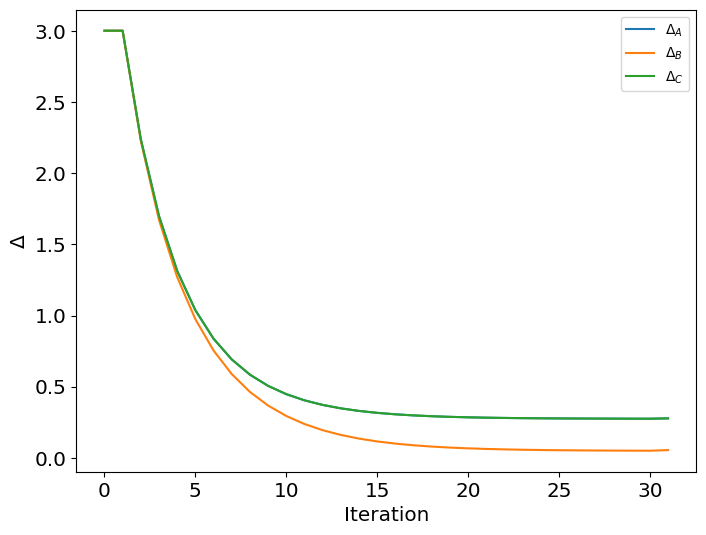

In [135]:
plt.figure(figsize=(8,6))
plt.xlabel('Iteration', size='x-large')
plt.ylabel(r'$\Delta$', size='x-large')
plt.xticks(size='x-large')
plt.yticks(size='x-large')
#plt.ylim(0,0.35)

#plt.plot(np.arange(len(dels[0])), dels[0], label = r'$\Delta_A$')
#plt.plot(np.arange(len(dels[0])), dels[1], label = r'$\Delta_B$')
#plt.plot(np.arange(len(dels[0])), dels[2], label = r'$\Delta_C$')
plt.plot(np.arange(len(dels[0])), np.abs(dels[0]), label = r'$\Delta_A$')
plt.plot(np.arange(len(dels[0])), np.abs(dels[1]), label = r'$\Delta_B$')
plt.plot(np.arange(len(dels[0])), np.abs(dels[2]), label = r'$\Delta_C$')

plt.legend()
plt.savefig(newpath+"//dels.png")

plt.show()

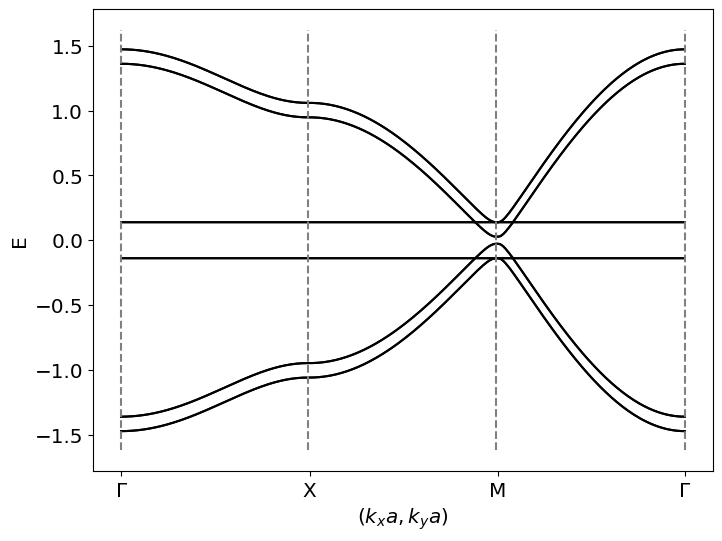

In [136]:
plt.figure(figsize=(8,6))
plt.xlabel("$(k_x a,k_y a)$", size='x-large')
plt.ylabel("E", size='x-large')
plt.yticks(size='x-large')
plt.xticks(ticks= [0, 100, 200, 299], labels=[r"$\Gamma$",r"X",r"M", r"$\Gamma$"], size='x-large')
#plt.ylim((-0.5, 0.5))

for i in energies:
    plt.plot(p, i, color='black')
#for i in energies2:
#    plt.plot(p, i, color='green', linestyle='dashdot')
#plt.plot(p, energies4[0], color='black', label=r'$\Delta_0=0.5$')
#plt.plot(p, energies2[0], color='green', linestyle='dashdot', label=r'$\Delta_0=1$')

plt.vlines([0, 99, 199, 299], [-emax, -emax, -emax, -emax], [emax, emax, emax, emax], colors= 'grey', linestyles='--')
#plt.vlines(250, -2, 2)
#plt.legend(fontsize='x-large')
#plt.savefig("Pictures/ESCpath.png")
plt.savefig(newpath+"//bands.png")

plt.show()

In [137]:
mM.Hk(0,0)

array([[ 0.        +0.j,  1.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
        -0.13882112+0.j,  0.        +0.j,  0.        +0.j],
       [ 1.        +0.j,  0.        +0.j,  1.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j, -0.02731916+0.j,  0.        +0.j],
       [ 0.        +0.j,  1.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j, -0.13882112+0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  1.        +0.j,  0.        +0.j,
         0.13882112+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.       

In [117]:
Earr = np.linspace(-1.5,1.5,250)
DOS = mM.DOS(Earr, k, sig=0.025)
DOS[0]

156.99583405574563

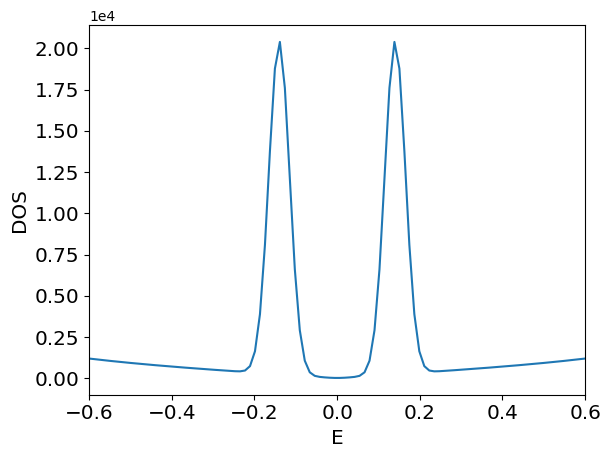

In [118]:
plt.xlabel("E", size='x-large')
plt.ylabel("DOS", size='x-large')
plt.yticks(size='x-large')
plt.xticks(size='x-large')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-3, 3))
plt.xlim(-0.6, 0.6)
plt.plot(Earr, DOS)

#plt.vlines([emax, -emax], 0, 100, colors='black')
#plt.legend()
#plt.savefig("Pictures/DOS_SC.png")
plt.show()